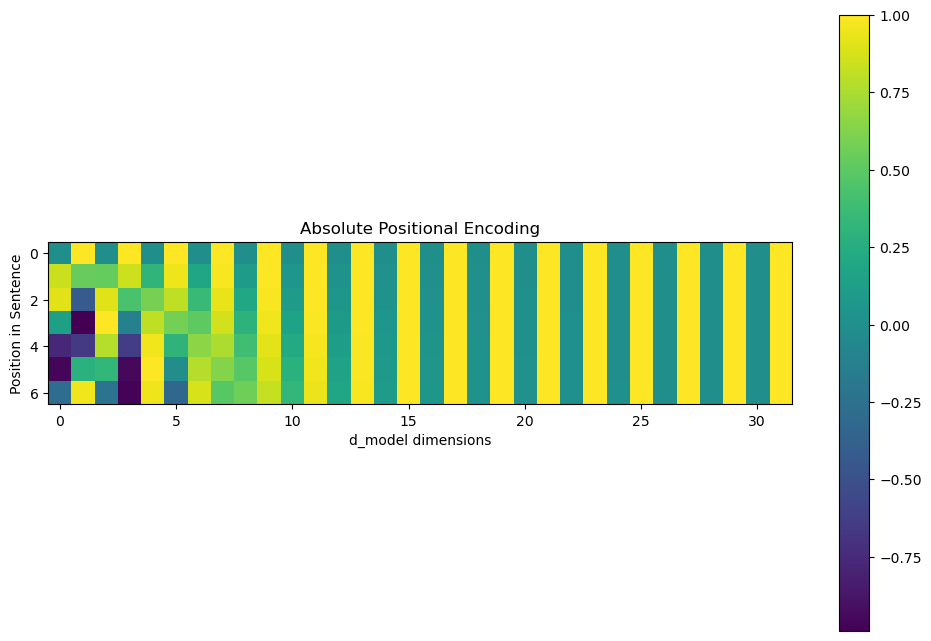

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_absolute_positional_encoding(seq_len, d_model):
    position = np.arange(seq_len)[:, np.newaxis]
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
    pe = np.zeros((seq_len, d_model))
    pe[:, 0::2] = np.sin(position * div_term)
    pe[:, 1::2] = np.cos(position * div_term)
    return pe

# 假设句子长度为8，d_model为32
sentence = "我爱你，中国。"
seq_len = len(sentence)
d_model = 32

absolute_positional_encoding = get_absolute_positional_encoding(seq_len, d_model)

# 展示绝对位置编码的效果
plt.figure(figsize=(12, 8))
plt.imshow(absolute_positional_encoding, cmap='viridis')
plt.colorbar()
plt.title("Absolute Positional Encoding")
plt.xlabel("d_model dimensions")
plt.ylabel("Position in Sentence")
plt.show()

In [1]:
test_dict={
    'a':1,
    'b':2
}

In [ ]:
**kwargs

SyntaxError: invalid syntax (3566872331.py, line 1)

In [3]:

import torch
import torch.nn.functional as F

class RelativePositionalEncoding(torch.nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(RelativePositionalEncoding, self).__init__()
        self.d_model = d_model
        self.max_len = max_len

        # 生成相对位置编码
        self.relative_positions_matrix = self.generate_relative_positions_matrix(max_len)
        self.embeddings_table = self.create_embeddings_table(max_len, d_model)

    def generate_relative_positions_matrix(self, length):
        range_vec = torch.arange(length)
        distance_mat = range_vec[None, :] - range_vec[:, None]
        return distance_mat

    def create_embeddings_table(self, max_len, d_model):
        table = torch.zeros(max_len, max_len, d_model)
        for pos in range(-max_len+1, max_len):
            table[:, pos] = self.get_relative_positional_encoding(pos, d_model)
        return table

    def get_relative_positional_encoding(self, pos, d_model):
        pos_encoding = torch.zeros(d_model)
        for i in range(0, d_model, 2):
            pos_encoding[i] = torch.sin(pos / (10000 ** ((2 * i)/d_model)))
            if i + 1 < d_model:
                pos_encoding[i + 1] = torch.cos(pos / (10000 ** ((2 * i)/d_model)))
        return pos_encoding

    def forward(self, length):
        positions_matrix = self.relative_positions_matrix[:length, :length]
        return F.embedding(positions_matrix, self.embeddings_table)

# 使用相对位置编码
sentence_length = len(sentence)
relative_positional_encoding = RelativePositionalEncoding(d_model, max_len=sentence_length)
relative_positional_encodings = relative_positional_encoding(sentence_length)

# 展示相对位置编码的效果
plt.figure(figsize=(12, 8))
plt.imshow(relative_positional_encodings.detach().numpy(), cmap='viridis')
plt.colorbar()
plt.title("Relative Positional Encoding")
plt.xlabel("d_model dimensions")
plt.ylabel("Relative Position")
plt.show()



TypeError: sin(): argument 'input' (position 1) must be Tensor, not float

In [8]:
import h5py

In [12]:
embedding_dir='/home/yuhaowang/data/embedding/TCGA-LUAD'
import os
test_case=os.listdir(embedding_dir)[2]

In [13]:
def read_assets_from_h5( h5_path: str) -> tuple:
    '''Read the assets from the h5 file'''
    assets = {}
    attrs = {}
    with h5py.File(h5_path, 'r') as f:
        for key in f.keys():
            assets[key] = f[key][:]
            if f[key].attrs is not None:
                attrs[key] = dict(f[key].attrs)
    return assets, attrs

In [16]:
res,_=read_assets_from_h5(os.path.join(embedding_dir,test_case))

In [ ]:
resb

{'cluster_centers': array([[ 0.06074125, -0.04797647,  0.0314041 , ..., -0.00976407,
          0.01675332, -0.00295427],
        [ 0.05002979, -0.04412391,  0.02896007, ...,  0.00101928,
          0.0109681 , -0.02167385],
        [ 0.04838791, -0.04288549,  0.01721936, ...,  0.00459621,
         -0.00435249, -0.03027587],
        ...,
        [ 0.04690852, -0.06893064,  0.07062602, ..., -0.02154604,
          0.00104492,  0.0054438 ],
        [ 0.0498773 , -0.03476577,  0.03767053, ..., -0.02402386,
          0.00083551, -0.01236775],
        [ 0.04598414, -0.03954945,  0.03422585, ..., -0.00312588,
          0.00804252, -0.03439237]]),
 'coords': array([[  824, 57945],
        [  824, 58969],
        [  824, 59993],
        ...,
        [86841, 46680],
        [86841, 47704],
        [87865, 45656]]),
 'features': array([[ 0.07768731,  0.01407234,  0.0958391 , ..., -0.00307684,
          0.01369488, -0.02950972],
        [ 0.01849896,  0.03556122,  0.07713094, ..., -0.01821687,
     

In [7]:
import pandas as pd
from pathlib import Path
import os

In [4]:
data_dir= '/home/yuhaowang/data/raw_data/BRACS'
#match all svs
svs = list(Path(data_dir).rglob("*.svs"))

In [9]:
#read xlsx
brcas_xlsx=os.path.join(data_dir,'BRACS.xlsx')
brcas=pd.read_excel(brcas_xlsx)
brcas

,WSI Filename,Patient Id,RoI,WSI label,Set
0,BRACS_264,85,24,PB,Testing
1,BRACS_265,87,18,UDH,Validation
2,BRACS_280,30,19,IC,Training
3,BRACS_281,111,37,IC,Training
4,BRACS_283,109,49,IC,Training
...,...,...,...,...,...
542,BRACS_1003728,71,1,ADH,Training
543,BRACS_1003730,176,1,PB,Training
544,BRACS_1003731,153,1,IC,Training
545,BRACS_1003732,153,1,IC,Training


/tmp/ipykernel_1012518/2565574285.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Training labels per class", y="Few-shot performance", data=df, palette="pastel")


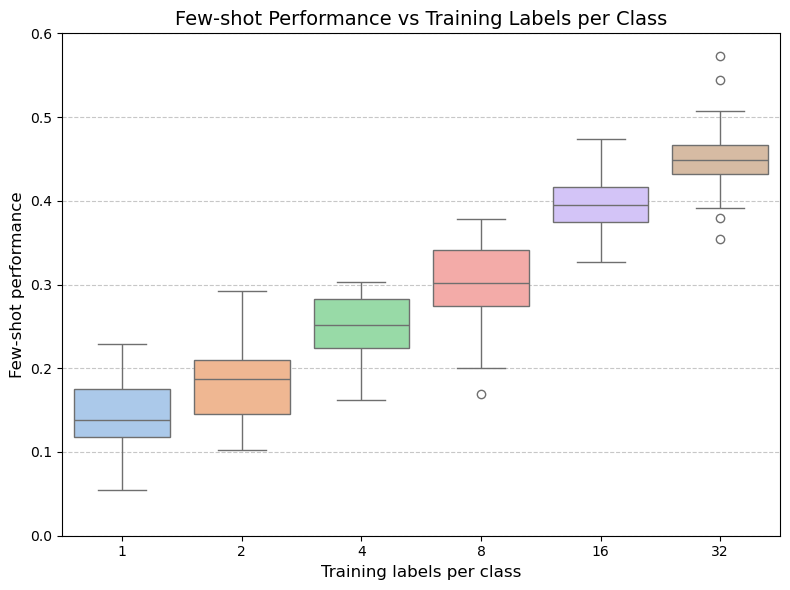

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Example data
np.random.seed(42)
data = {
    "Training labels per class": np.repeat([1, 2, 4, 8, 16, 32], 20),
    "Few-shot performance": np.concatenate([
        np.random.normal(0.15, 0.05, 20),
        np.random.normal(0.2, 0.05, 20),
        np.random.normal(0.25, 0.05, 20),
        np.random.normal(0.3, 0.05, 20),
        np.random.normal(0.4, 0.05, 20),
        np.random.normal(0.45, 0.05, 20)
    ])
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Training labels per class", y="Few-shot performance", data=df, palette="pastel")

# Customize the plot
plt.title("Few-shot Performance vs Training Labels per Class", fontsize=14)
plt.xlabel("Training labels per class", fontsize=12)
plt.ylabel("Few-shot performance", fontsize=12)
plt.ylim(0, 0.6)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
data=pd.read_csv('/home/yuhaowang/project/FMBC/finetune/dataset_csv/subtype/BRACS.csv')
data

,slide_id,Patient Id,xi_label,cu_label,Set
0,BRACS_264,85,1,0,Testing
1,BRACS_265,87,2,0,Validation
2,BRACS_280,30,6,2,Training
3,BRACS_281,111,6,2,Training
4,BRACS_283,109,6,2,Training
...,...,...,...,...,...
542,BRACS_1003728,71,4,1,Training
543,BRACS_1003730,176,1,0,Training
544,BRACS_1003731,153,6,2,Training
545,BRACS_1003732,153,6,2,Training


In [4]:
cooarse_data=data[['slide_id','cu_label']]
#rename cu_label to label
coarse_data=cooarse_data.rename(columns={'cu_label':'label'})
coarse_data.to_csv('/home/yuhaowang/project/FMBC/finetune/dataset_csv/subtype/BRACS_coarse.csv',index=False)

In [7]:
fine_grained_data=data[['slide_id','xi_label']]
#rename fine_grained_label to label
fine_grained_data=fine_grained_data.rename(columns={'xi_label':'label'})
fine_grained_data.to_csv('/home/yuhaowang/project/FMBC/finetune/dataset_csv/subtype/BRACS_fine_grained.csv',index=False)
